In [1]:
import numpy as np
import pandas as pd
from hint_search import read_char_values
from hint_search import word_to_value

In [2]:
rus_words = pd.read_csv('word_rus.txt',
                       header=None,
                       names=['word'])
rus_words

,word
0,аарон
1,абажур
2,абакан
3,абалкин
4,абатуров
...,...
17156,ящер
17157,ящерица
17158,ящерка
17159,ящик


# Добавим колонку с длиной слова.

In [3]:
rus_words['length'] = rus_words.word.apply(lambda x: len(x))
rus_words

,word,length
0,аарон,5
1,абажур,6
2,абакан,6
3,абалкин,7
4,абатуров,8
...,...,...
17156,ящер,4
17157,ящерица,7
17158,ящерка,6
17159,ящик,4


# Выкинем слова, которые длинее 15 символов.

In [4]:
rus_words = rus_words.query('length <= 15')
rus_words

,word,length
0,аарон,5
1,абажур,6
2,абакан,6
3,абалкин,7
4,абатуров,8
...,...,...
17156,ящер,4
17157,ящерица,7
17158,ящерка,6
17159,ящик,4


# Добавим колонку со стоимостью слова (без учета бонусных полей на доске)

In [6]:
char_values = read_char_values('char_values.json')

rus_words['value'] = rus_words.word.apply(lambda x: word_to_value(x, char_values))
rus_words

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,word,length,value
0,аарон,5,6
1,абажур,6,15
2,абакан,6,9
3,абалкин,7,11
4,абатуров,8,15
...,...,...,...
17156,ящер,4,16
17157,ящерица,7,28
17158,ящерка,6,19
17159,ящик,4,16


# Отранжируем слова по цене (без учета бонусных полей на доске).

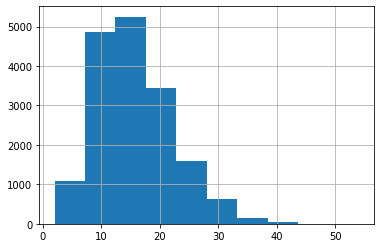

In [9]:
rus_words['value'].hist() # распределение стоимости слов

In [10]:
rus_words.sort_values(by='value', )

,word,length,value
502,ао,2,2
13400,си,2,3
14839,ти,2,3
5145,ион,3,3
9538,ооо,3,3
...,...,...,...
6442,коэффициент,11,49
15628,фальсификация,13,49
2556,вышивальщица,12,50
8958,неэффективность,15,51
